# Chap 16 - Ex1: apply PCA for marketing_data.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [2]:
mkt = pd.read_csv('data/marketing_data.csv')
mkt

,week,Year,Market.Share,Av.Price.per.kg,Non-Promo Price.per.kg,Promo.Vol.Share,Total.Weigh,Share.of.Ean.Weigh,Avg price.vs.PLB,Non.promo.price.vs.PLB,...,Penetration,Competitor,GRP.radio,Reach.radio,GRP.TV,Reach.TV,Reach.cinema,GRP.outdoor,GRP.print,Share.of.spend
0,19,2010,38.40,7.61,7.77,26.87,84,19.28,2.01,2.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20,2010,36.80,7.60,7.80,29.42,84,18.90,2.00,2.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21,2010,35.21,7.63,7.85,27.27,82,19.11,2.07,2.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22,2010,35.03,7.22,7.76,52.48,88,18.67,1.90,2.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,2010,32.37,7.70,7.78,16.11,82,18.61,2.18,2.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,14,2013,33.26,7.63,7.66,12.96,90,17.85,2.60,2.64,...,71.6,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,15,2013,33.99,7.59,7.64,19.24,89,17.53,2.65,2.66,...,71.6,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,16,2013,30.57,7.66,7.68,5.97,88,17.30,2.78,2.72,...,71.6,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,17,2013,32.24,7.63,7.66,7.20,88,17.05,2.81,2.73,...,71.6,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   week                       156 non-null    int64  
 1   Year                       156 non-null    int64  
 2   Market.Share               156 non-null    float64
 3   Av.Price.per.kg            156 non-null    float64
 4   Non-Promo Price.per.kg     156 non-null    float64
 5   Promo.Vol.Share            156 non-null    float64
 6   Total.Weigh                156 non-null    int64  
 7   Share.of.Ean.Weigh         156 non-null    float64
 8   Avg price.vs.PLB           156 non-null    float64
 9   Non.promo.price.vs.PLB     156 non-null    float64
 10  Promo.vol.sh.index.vs.PLB  156 non-null    float64
 11  Total.cm.shelf             156 non-null    float64
 12  Shelf.share                156 non-null    float64
 13  Top.of.mind                123 non-null    float64

In [10]:
mkt.isnull().sum()

week                           0
Year                           0
Market.Share                   0
Av.Price.per.kg                0
Non-Promo Price.per.kg         0
Promo.Vol.Share                0
Total.Weigh                    0
Share.of.Ean.Weigh             0
Avg price.vs.PLB               0
Non.promo.price.vs.PLB         0
Promo.vol.sh.index.vs.PLB      0
Total.cm.shelf                 0
Shelf.share                    0
Top.of.mind                   33
Spontaneous                   33
Aided                         33
Penetration                   33
Competitor                    45
GRP.radio                    142
Reach.radio                  142
GRP.TV                       104
Reach.TV                     104
Reach.cinema                 138
GRP.outdoor                  155
GRP.print                    134
Share.of.spend                40
dtype: int64

## <span style = 'color:brown'> Drop columns have more than 40% NA values (more than 64 NA values)

In [21]:
mkt_cleaned = mkt.copy()

for col in mkt_cleaned.columns:
    if mkt_cleaned[col].isnull().sum() >= 64:
        mkt_cleaned = mkt_cleaned.drop(col, axis=1)
    else: continue

mkt_cleaned

,week,Year,Market.Share,Av.Price.per.kg,Non-Promo Price.per.kg,Promo.Vol.Share,Total.Weigh,Share.of.Ean.Weigh,Avg price.vs.PLB,Non.promo.price.vs.PLB,Promo.vol.sh.index.vs.PLB,Total.cm.shelf,Shelf.share,Top.of.mind,Spontaneous,Aided,Penetration,Competitor,Share.of.spend
0,19,2010,38.40,7.61,7.77,26.87,84,19.28,2.01,2.20,2.02,754253.0,0.25,NaN,NaN,NaN,NaN,NaN,NaN
1,20,2010,36.80,7.60,7.80,29.42,84,18.90,2.00,2.19,1.59,752248.7,0.25,NaN,NaN,NaN,NaN,NaN,NaN
2,21,2010,35.21,7.63,7.85,27.27,82,19.11,2.07,2.23,1.03,750244.4,0.25,NaN,NaN,NaN,NaN,NaN,NaN
3,22,2010,35.03,7.22,7.76,52.48,88,18.67,1.90,2.12,1.04,748240.1,0.25,NaN,NaN,NaN,NaN,NaN,NaN
4,23,2010,32.37,7.70,7.78,16.11,82,18.61,2.18,2.15,0.66,746235.8,0.25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,14,2013,33.26,7.63,7.66,12.96,90,17.85,2.60,2.64,0.80,596621.6,0.20,50.2,83.7,99.5,71.6,4.6,NaN
152,15,2013,33.99,7.59,7.64,19.24,89,17.53,2.65,2.66,1.12,596645.0,0.20,50.2,83.7,99.5,71.6,4.7,NaN
153,16,2013,30.57,7.66,7.68,5.97,88,17.30,2.78,2.72,0.28,596668.4,0.20,50.2,83.7,99.5,71.6,4.6,NaN
154,17,2013,32.24,7.63,7.66,7.20,88,17.05,2.81,2.73,0.36,596691.8,0.20,50.2,83.7,99.5,71.6,4.7,NaN


## <span style = 'color:brown'> Use sklearn.impute.KNNImputer to fill the missing values

In [27]:
from sklearn.impute import KNNImputer

mkt_cleaned = pd.DataFrame(
    KNNImputer(n_neighbors=5).fit_transform(mkt_cleaned),
    columns=mkt_cleaned.columns
)

mkt_cleaned

,week,Year,Market.Share,Av.Price.per.kg,Non-Promo Price.per.kg,Promo.Vol.Share,Total.Weigh,Share.of.Ean.Weigh,Avg price.vs.PLB,Non.promo.price.vs.PLB,Promo.vol.sh.index.vs.PLB,Total.cm.shelf,Shelf.share,Top.of.mind,Spontaneous,Aided,Penetration,Competitor,Share.of.spend
0,19.0,2010.0,38.40,7.61,7.77,26.87,84.0,19.28,2.01,2.20,2.02,754253.0,0.25,48.1,77.9,98.1,0.0,0.26,91.115598
1,20.0,2010.0,36.80,7.60,7.80,29.42,84.0,18.90,2.00,2.19,1.59,752248.7,0.25,48.1,77.9,98.1,0.0,0.26,91.115598
2,21.0,2010.0,35.21,7.63,7.85,27.27,82.0,19.11,2.07,2.23,1.03,750244.4,0.25,48.1,77.9,98.1,0.0,0.26,91.115598
3,22.0,2010.0,35.03,7.22,7.76,52.48,88.0,18.67,1.90,2.12,1.04,748240.1,0.25,48.1,77.9,98.1,0.0,0.26,91.115598
4,23.0,2010.0,32.37,7.70,7.78,16.11,82.0,18.61,2.18,2.15,0.66,746235.8,0.25,48.1,77.9,98.1,0.0,0.26,91.115598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,14.0,2013.0,33.26,7.63,7.66,12.96,90.0,17.85,2.60,2.64,0.80,596621.6,0.20,50.2,83.7,99.5,71.6,4.60,56.262011
152,15.0,2013.0,33.99,7.59,7.64,19.24,89.0,17.53,2.65,2.66,1.12,596645.0,0.20,50.2,83.7,99.5,71.6,4.70,56.262011
153,16.0,2013.0,30.57,7.66,7.68,5.97,88.0,17.30,2.78,2.72,0.28,596668.4,0.20,50.2,83.7,99.5,71.6,4.60,56.262011
154,17.0,2013.0,32.24,7.63,7.66,7.20,88.0,17.05,2.81,2.73,0.36,596691.8,0.20,50.2,83.7,99.5,71.6,4.70,56.262011


Number of numerical fields: 19

All numerical fields: Index(['week', 'Year', 'Market.Share', 'Av.Price.per.kg', 'Non-Promo Price.per.kg', 'Promo.Vol.Share', 'Total.Weigh', 'Share.of.Ean.Weigh', 'Avg price.vs.PLB', 'Non.promo.price.vs.PLB', 'Promo.vol.sh.index.vs.PLB', 'Total.cm.shelf', 'Shelf.share', 'Top.of.mind', 'Spontaneous', 'Aided', 'Penetration', 'Competitor', 'Share.of.spend'], dtype='object')



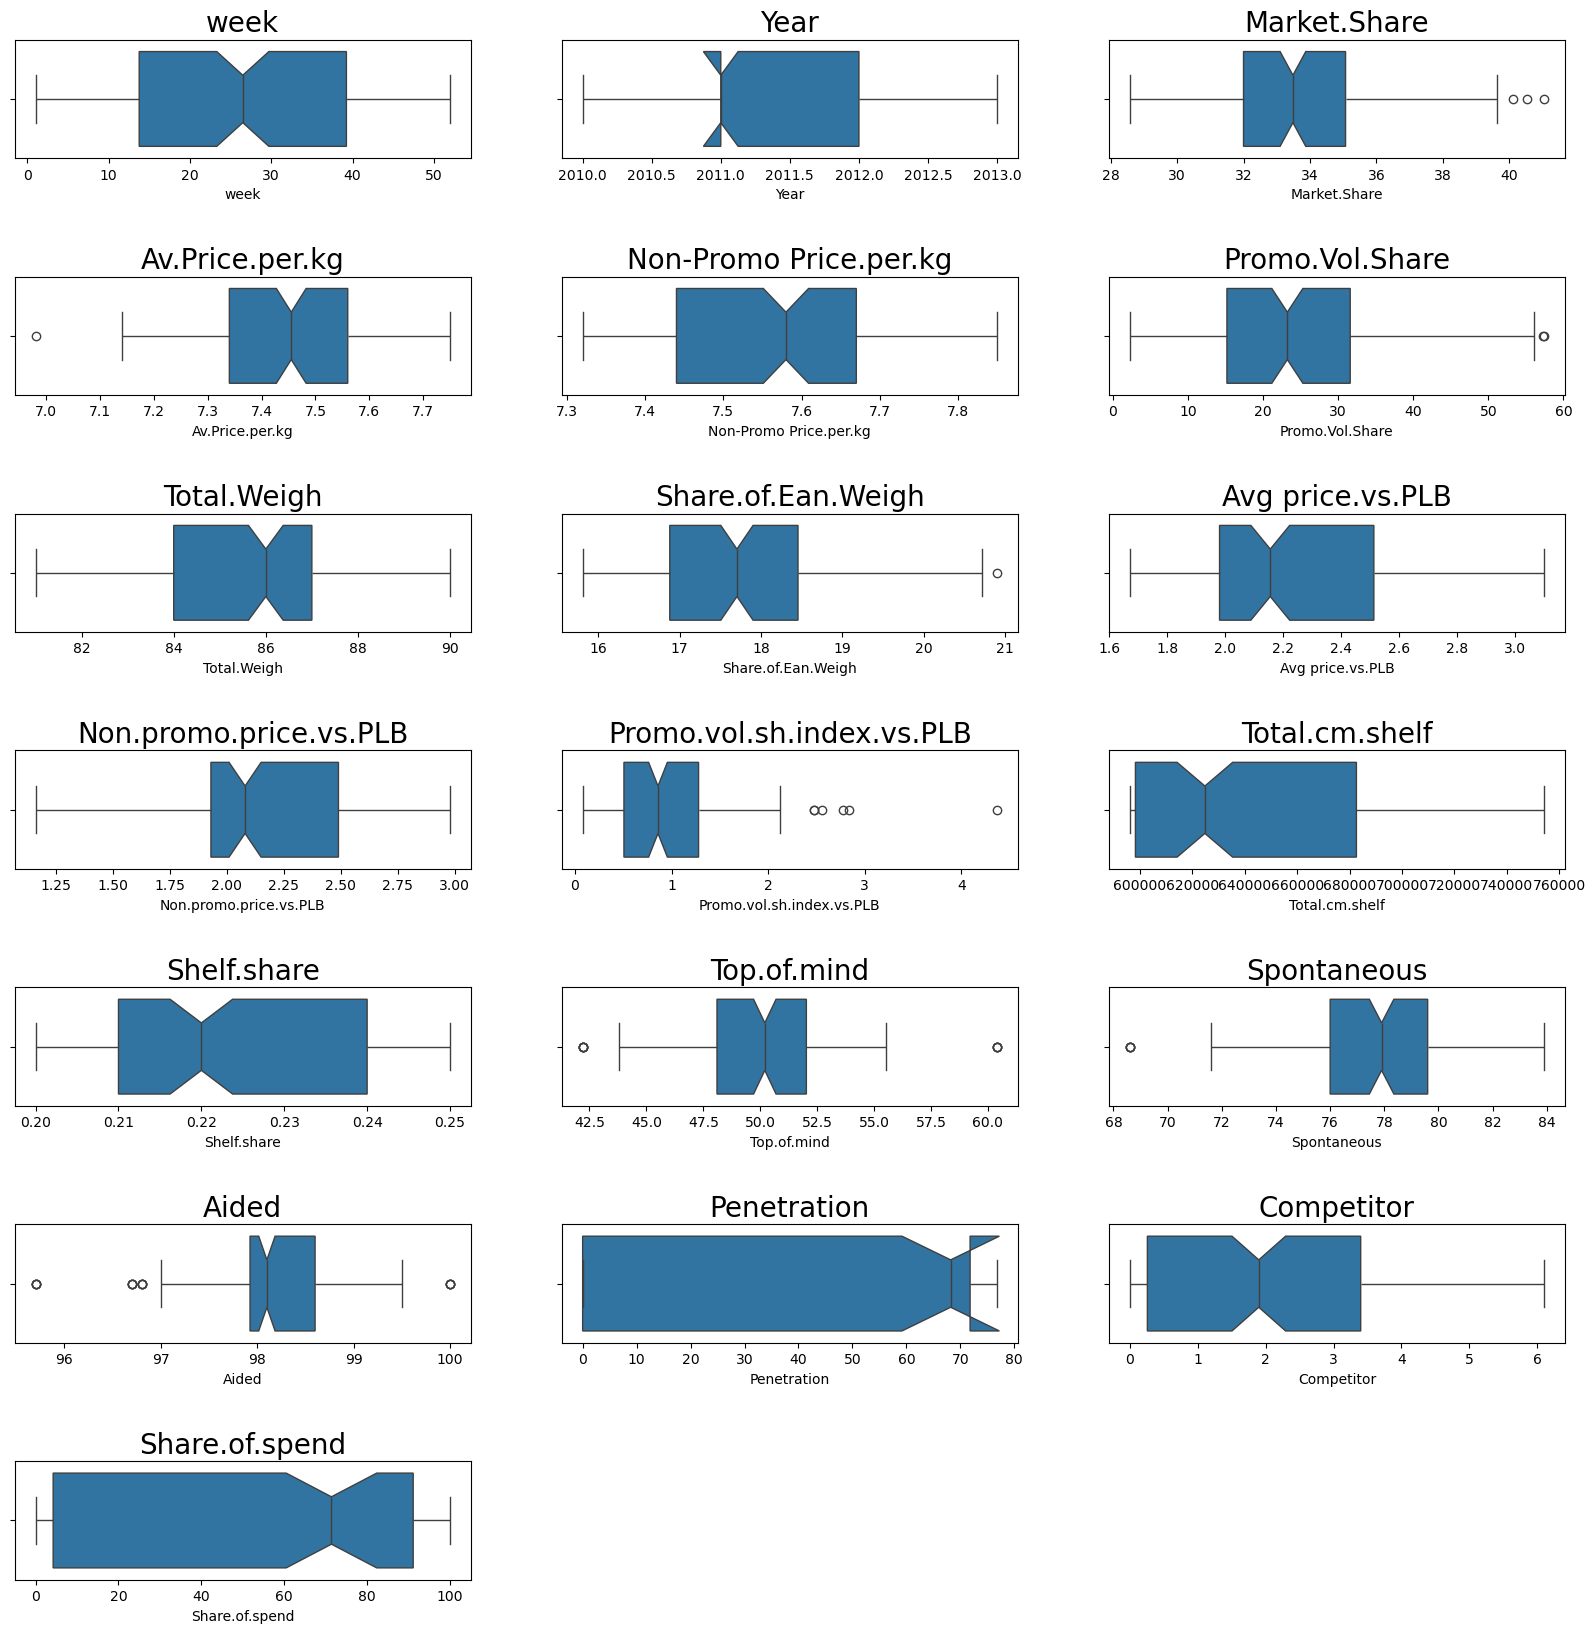

In [58]:
## Visualize numerical variables

numeric_cols = mkt_cleaned.columns

col = 3
row = (len(numeric_cols)//col) if ( (len(numeric_cols)%col) == 0) else ((len(numeric_cols)//col) + 1)

print(f'Number of numerical fields: {len(numeric_cols)}\n')
print(f'All numerical fields: {numeric_cols}\n')

plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.2, hspace=1)
for i in range(1, len(numeric_cols)+1):
    try:
        plt.subplot(row, col, i)
        sbn.boxplot(data = mkt_cleaned, x = numeric_cols[i-1], notch = True)
        plt.title(numeric_cols[i-1], size = 20)
    except Exception:
        print('Error {}'.format(numeric_cols[i-1]))
        break
plt.show()

## <span style = 'color:brown'> Apply PCA for mkt_cleaned data
## <span style = 'color:brown'> Use MinMaxScaler (not many outliers)

In [59]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca_90 = PCA(0.9)

mkt_pca = pd.DataFrame(
    pca_90.fit_transform(MinMaxScaler().fit_transform(mkt_cleaned)),
    columns = [f'PC{i+1}' for i in range(pca_90.n_components_)]
)

mkt_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.350837,0.354377,0.002157,-0.262249,-0.150096,0.071853,-0.227423
1,-1.317523,0.370351,0.003786,-0.279636,-0.117370,0.006306,-0.197178
2,-1.298810,0.432924,0.000204,-0.360091,-0.031665,-0.202965,-0.280178
3,-1.309272,0.195248,0.090025,-0.028987,-0.221407,0.364024,0.053393
4,-1.192698,0.440584,-0.141189,-0.400552,0.092707,-0.438611,-0.116713
...,...,...,...,...,...,...,...
151,0.941665,0.602249,-0.155010,-0.038355,0.028331,0.405808,0.159621
152,0.935019,0.554938,-0.087022,-0.006672,0.028420,0.444138,0.056044
153,1.025075,0.672178,-0.199773,-0.144245,0.164776,0.107591,0.146713
154,1.020971,0.638567,-0.170992,-0.107928,0.157513,0.184710,0.136719


In [60]:
pca_90.explained_variance_ratio_

array([0.46036357, 0.15204695, 0.09178727, 0.08260772, 0.04845832,
       0.04272171, 0.03401421])

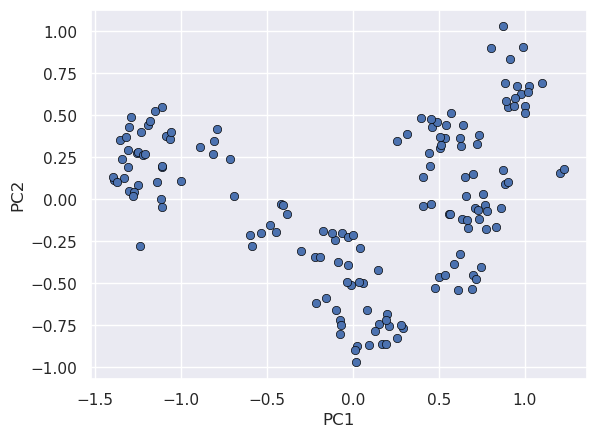

In [63]:
sbn.set_theme(style = 'darkgrid')
sbn.scatterplot(data = mkt_pca, x = 'PC1', y = 'PC2', edgecolors = 'black')
plt.show()

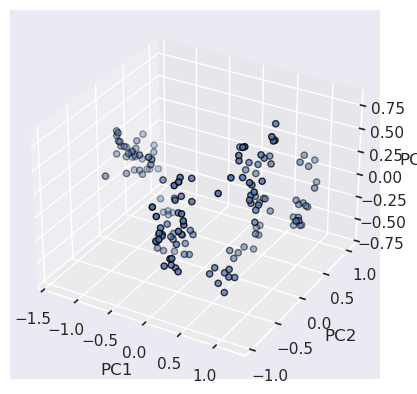

In [65]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs = mkt_pca['PC1'], ys = mkt_pca['PC2'], zs = mkt_pca['PC3'], edgecolors='black')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()